# Setup

In [328]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [329]:
train_df = pd.read_csv("./data/train.csv")
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Filling the Missing Values

In [330]:
target = "Survived"
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Embarked", "Fare", "Cabin"]
num_features = ["Age", "SibSp", "Parch", "Fare"]
cat_features = ["Pclass", "Sex", "Embarked", "Cabin"]

In [331]:
train_passengerIds = train_df["PassengerId"]

In [332]:
from transformers import transform_cabin

train_df = transform_cabin(train_df)

In [333]:
train_df[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Embarked  889 non-null    object 
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


In [334]:
median_age = train_df["Age"].median()
median_age

np.float64(28.0)

In [335]:
train_df["Age"] = train_df["Age"].fillna(28)

In [336]:
train_df[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Embarked  889 non-null    object 
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


In [337]:
train_df[train_df["Embarked"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B,NaN


In [338]:
train_df[features].groupby(["Embarked", "Pclass"])["Fare"].median()

Embarked  Pclass
C         1         78.2667
          2         24.0000
          3          7.8958
Q         1         90.0000
          2         12.3500
          3          7.7500
S         1         52.0000
          2         13.5000
          3          8.0500
Name: Fare, dtype: float64

In [339]:
train_df["Embarked"] = train_df["Embarked"].fillna('C')

In [340]:
train_df[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Embarked  891 non-null    object 
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


In [341]:
cat_features

['Pclass', 'Sex', 'Embarked', 'Cabin']

<Axes: xlabel='Fare', ylabel='Density'>

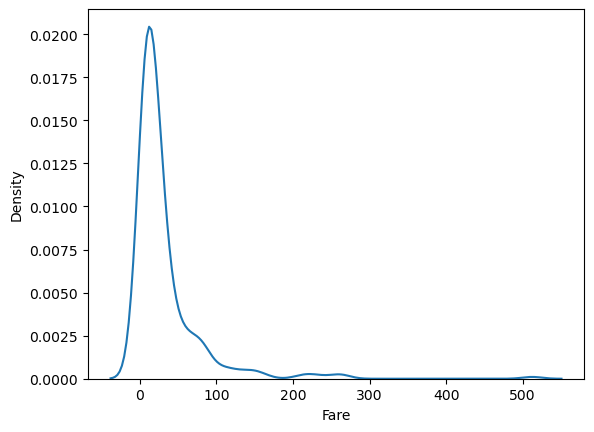

In [342]:
sns.kdeplot(train_df["Fare"])

# Normalizing Values

In [343]:
from transformers import transform_fare

train_df = transform_fare(train_df)

<Axes: xlabel='Fare', ylabel='Density'>

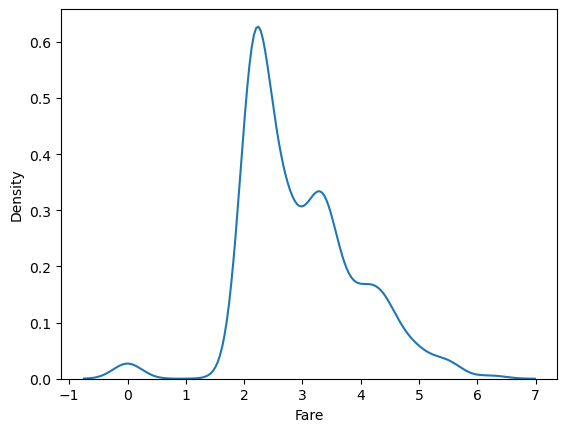

In [344]:
sns.kdeplot(train_df["Fare"])

# Encoding Values

In [345]:
ordinal_encoding = {
   "Pclass": [3, 2, 1]
}

In [346]:
train_df["Pclass"].unique()

array([3, 1, 2])

In [347]:
from transformers import encode_ordinal

train_df = encode_ordinal(train_df, ordinal_encoding)

In [348]:
train_df["Pclass"].unique()

array([0, 2, 1])

In [349]:
train_df[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Embarked  891 non-null    object 
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


In [350]:
nominal_features = ['Sex', 'Embarked', 'Cabin']

In [351]:
from transformers import encode_nominal
train_df = encode_nominal(train_df, nominal_features)
train_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_None,Cabin_T
0,1,0,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,2.110213,1,0,1,0,0,0,0,0,0,1,0
1,2,1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,4.280593,0,0,0,0,1,0,0,0,0,0,0
2,3,1,0,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,2.188856,0,0,1,0,0,0,0,0,0,1,0
3,4,1,2,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,3.990834,0,0,1,0,1,0,0,0,0,0,0
4,5,0,0,"Allen, Mr. William Henry",35.0,0,0,373450,2.202765,1,0,1,0,0,0,0,0,0,1,0


In [352]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Cabin_B',
       'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_None',
       'Cabin_T'],
      dtype='object')

In [353]:
nominal_features

['Sex', 'Embarked', 'Cabin']

In [354]:
dummy_features = [ f for prefix in nominal_features for f in train_df.columns if prefix in f ]
dummy_features

['Sex_male',
 'Embarked_Q',
 'Embarked_S',
 'Cabin_B',
 'Cabin_C',
 'Cabin_D',
 'Cabin_E',
 'Cabin_F',
 'Cabin_G',
 'Cabin_None',
 'Cabin_T']

In [355]:
features = [ f for f in features if f not in nominal_features ] + dummy_features
features

['Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Sex_male',
 'Embarked_Q',
 'Embarked_S',
 'Cabin_B',
 'Cabin_C',
 'Cabin_D',
 'Cabin_E',
 'Cabin_F',
 'Cabin_G',
 'Cabin_None',
 'Cabin_T']

In [356]:
cat_features = [ f for f in cat_features if f not in nominal_features ] + dummy_features
cat_features

['Pclass',
 'Sex_male',
 'Embarked_Q',
 'Embarked_S',
 'Cabin_B',
 'Cabin_C',
 'Cabin_D',
 'Cabin_E',
 'Cabin_F',
 'Cabin_G',
 'Cabin_None',
 'Cabin_T']

<Axes: >

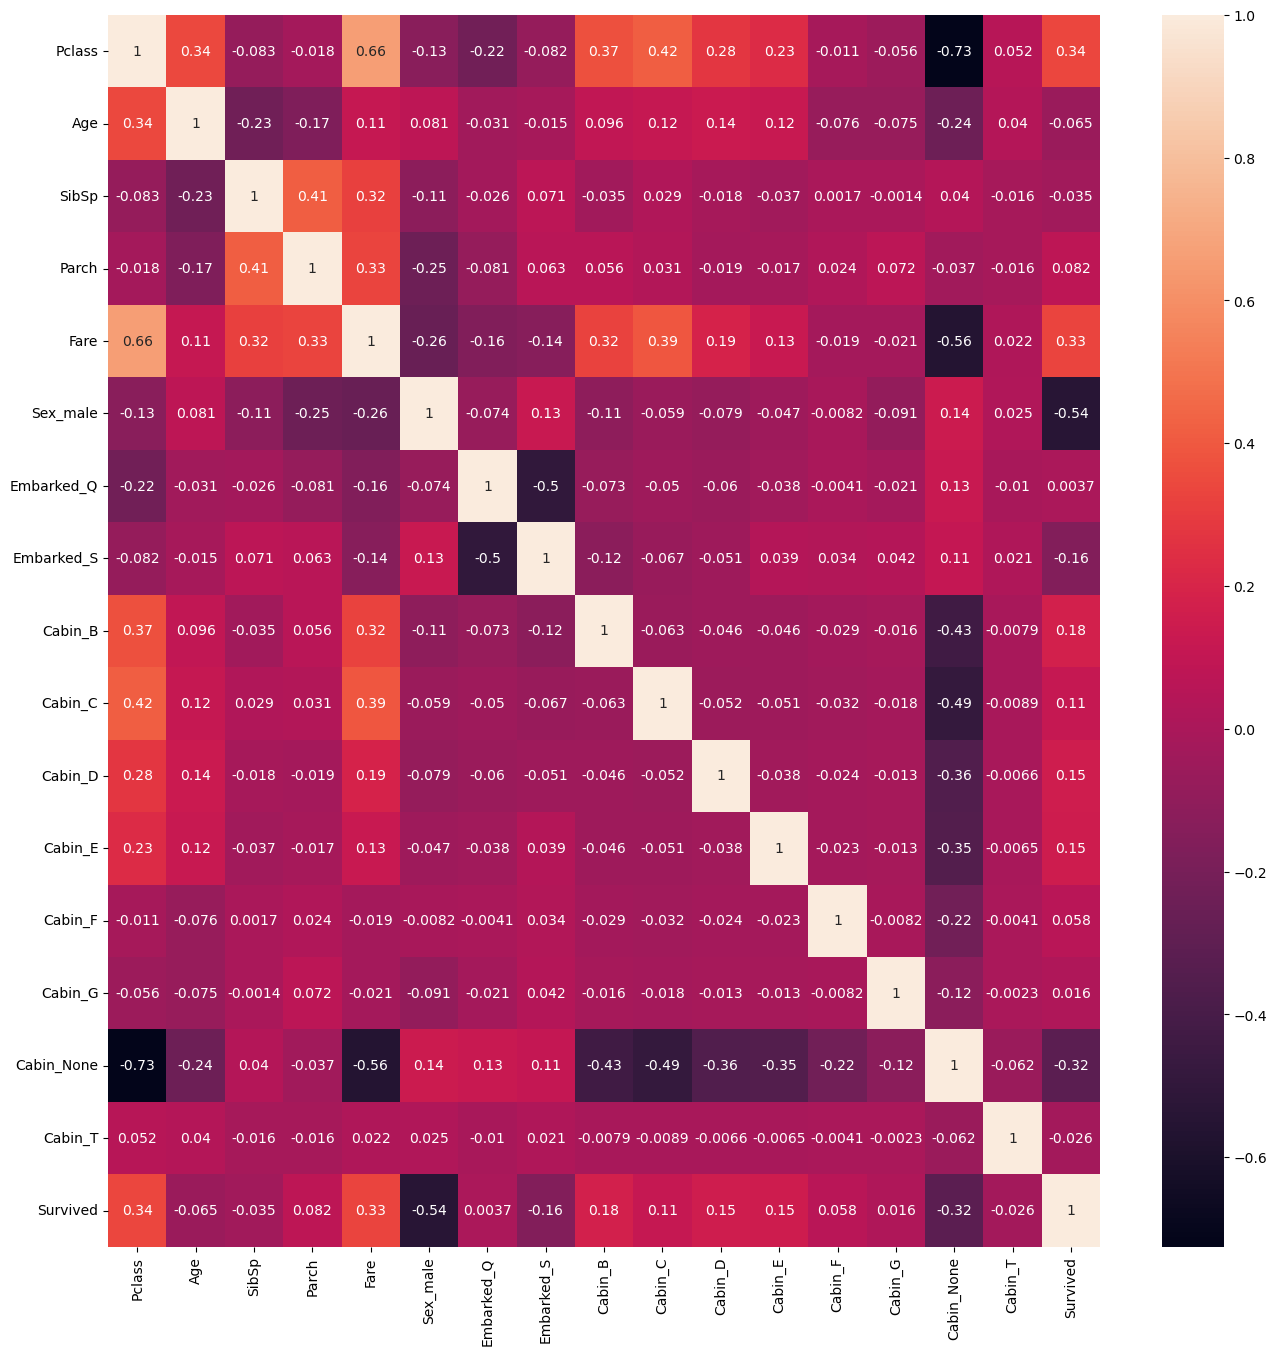

In [357]:
plt.figure(figsize=(16, 16))
sns.heatmap(train_df[features + [target]].corr(), annot=True)

# Creating new Features

In [358]:
from helpers import find_mutual_information

In [359]:
better_features = []

for index1 in range(len(num_features)):
    for index2 in range(index1 + 1, len(num_features)):
        df = train_df.copy()
        feature1 = num_features[index1]
        feature2 = num_features[index2]
        df["new_feature"] = df[feature1] + df[feature2]
        mi_scores = find_mutual_information(df, features + ["new_feature"], target, cat_features)
        if mi_scores["new_feature"] > mi_scores[feature1] and mi_scores["new_feature"] > mi_scores[feature2]:
            difference = mi_scores["new_feature"] - max(mi_scores[feature1], mi_scores[feature2])
            better_features.append((feature1, feature2, float(difference.round(4))))

better_features # better combination in the format (feature1, feature2, difference)

[('Age', 'SibSp', 0.0029),
 ('Age', 'Parch', 0.0016),
 ('SibSp', 'Parch', 0.0344)]

Combining SibSp and Parch to create a unified feature for family members seems to be a good idea

In [360]:
from transformers import combine_family_members

train_df = combine_family_members(train_df)

In [361]:
features.append("FamilyMembers")
num_features.append("FamilyMembers")

In [362]:
features.remove("SibSp")
features.remove("Parch")
num_features.remove("SibSp")
num_features.remove("Parch")

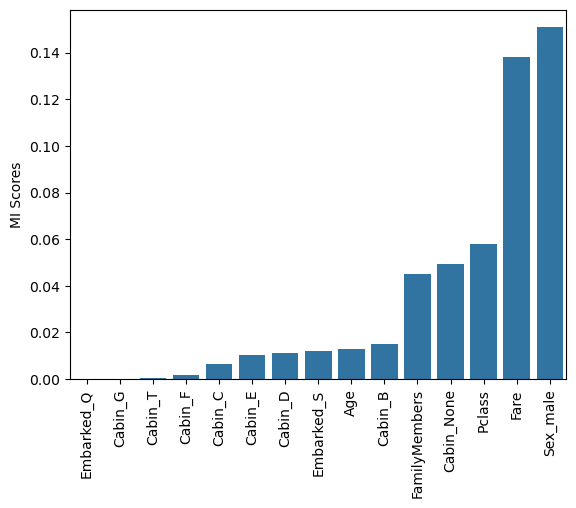

In [363]:
mi_scores = find_mutual_information(train_df, features, target, cat_features)
sns.barplot(mi_scores.sort_values())
plt.xticks(rotation=90);

In [364]:
mi_scores.sort_values()

Embarked_Q       0.000007
Cabin_G          0.000125
Cabin_T          0.000544
Cabin_F          0.001618
Cabin_C          0.006354
Cabin_E          0.010325
Cabin_D          0.011124
Embarked_S       0.011925
Age              0.013082
Cabin_B          0.014982
FamilyMembers    0.044993
Cabin_None       0.049270
Pclass           0.058107
Fare             0.138035
Sex_male         0.150870
Name: MI Scores, dtype: float64

# Saving the transformed Datasets

In [365]:
features

['Pclass',
 'Age',
 'Fare',
 'Sex_male',
 'Embarked_Q',
 'Embarked_S',
 'Cabin_B',
 'Cabin_C',
 'Cabin_D',
 'Cabin_E',
 'Cabin_F',
 'Cabin_G',
 'Cabin_None',
 'Cabin_T',
 'FamilyMembers']

In [366]:
train_df = train_df[["PassengerId", "Survived"] + features]

In [367]:
train_df.head()

,PassengerId,Survived,Pclass,Age,Fare,Sex_male,Embarked_Q,Embarked_S,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_None,Cabin_T,FamilyMembers
0,1,0,0,22.0,2.110213,1,0,1,0,0,0,0,0,0,1,0,1
1,2,1,2,38.0,4.280593,0,0,0,0,1,0,0,0,0,0,0,1
2,3,1,0,26.0,2.188856,0,0,1,0,0,0,0,0,0,1,0,0
3,4,1,2,35.0,3.990834,0,0,1,0,1,0,0,0,0,0,0,1
4,5,0,0,35.0,2.202765,1,0,1,0,0,0,0,0,0,1,0,0


In [368]:
train_df.to_csv("./data/transformed_train.csv", index=None)

In [369]:
test_df = pd.read_csv("./data/test.csv")
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [370]:
test_passengerIds = test_df["PassengerId"]

In [371]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [372]:
test_df["Age"] = test_df["Age"].fillna(median_age)

In [373]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [374]:
test_df[test_df["Fare"].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [375]:
test_df["Fare"] = test_df["Fare"].fillna(0)

In [376]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [377]:
from transformers import apply_all

test_df = apply_all(test_df, ordinal_encoding, nominal_features)
test_df

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_None,FamilyMembers
0,892,0,"Kelly, Mr. James",34.5,0,0,330911,2.178064,1,1,0,0,0,0,0,0,0,1,0
1,893,0,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,2.079442,0,0,1,0,0,0,0,0,0,1,1
2,894,1,"Myles, Mr. Thomas Francis",62.0,0,0,240276,2.369075,1,1,0,0,0,0,0,0,0,1,0
3,895,0,"Wirz, Mr. Albert",27.0,0,0,315154,2.268252,1,0,1,0,0,0,0,0,0,1,0
4,896,0,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,2.586824,0,0,1,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,"Spector, Mr. Woolf",28.0,0,0,A.5. 3236,2.202765,1,0,1,0,0,0,0,0,0,1,0
414,1306,2,"Oliva y Ocana, Dona. Fermina",39.0,0,0,PC 17758,4.699571,0,0,0,0,1,0,0,0,0,0,0
415,1307,0,"Saether, Mr. Simon Sivertsen",38.5,0,0,SOTON/O.Q. 3101262,2.110213,1,0,1,0,0,0,0,0,0,1,0
416,1308,0,"Ware, Mr. Frederick",28.0,0,0,359309,2.202765,1,0,1,0,0,0,0,0,0,1,0


In [378]:
test_df["Cabin_T"] = pd.Series(np.zeros(len(test_df)))

In [379]:
test_df[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pclass         418 non-null    int64  
 1   Age            418 non-null    float64
 2   Fare           418 non-null    float64
 3   Sex_male       418 non-null    int64  
 4   Embarked_Q     418 non-null    int64  
 5   Embarked_S     418 non-null    int64  
 6   Cabin_B        418 non-null    int64  
 7   Cabin_C        418 non-null    int64  
 8   Cabin_D        418 non-null    int64  
 9   Cabin_E        418 non-null    int64  
 10  Cabin_F        418 non-null    int64  
 11  Cabin_G        418 non-null    int64  
 12  Cabin_None     418 non-null    int64  
 13  Cabin_T        418 non-null    float64
 14  FamilyMembers  418 non-null    int64  
dtypes: float64(3), int64(12)
memory usage: 49.1 KB


In [380]:
test_df = test_df[["PassengerId"] + features]

In [381]:
test_df

,PassengerId,Pclass,Age,Fare,Sex_male,Embarked_Q,Embarked_S,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_None,Cabin_T,FamilyMembers
0,892,0,34.5,2.178064,1,1,0,0,0,0,0,0,0,1,0.0,0
1,893,0,47.0,2.079442,0,0,1,0,0,0,0,0,0,1,0.0,1
2,894,1,62.0,2.369075,1,1,0,0,0,0,0,0,0,1,0.0,0
3,895,0,27.0,2.268252,1,0,1,0,0,0,0,0,0,1,0.0,0
4,896,0,22.0,2.586824,0,0,1,0,0,0,0,0,0,1,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,28.0,2.202765,1,0,1,0,0,0,0,0,0,1,0.0,0
414,1306,2,39.0,4.699571,0,0,0,0,1,0,0,0,0,0,0.0,0
415,1307,0,38.5,2.110213,1,0,1,0,0,0,0,0,0,1,0.0,0
416,1308,0,28.0,2.202765,1,0,1,0,0,0,0,0,0,1,0.0,0


In [382]:
test_df.to_csv("./data/transformed_test.csv", index=None)